# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(
    mouse_metadata, 
    study_results, 
    how="left", 
    on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [65]:
# Checking the number of mice.
mouse_results["Mouse ID"].nunique()

249

In [66]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(mouse_results.loc[mouse_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique())

['g989']


In [67]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate = mouse_results.loc[mouse_results["Mouse ID"] == 'g989']
mouse_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_cleaned = mouse_results.loc[mouse_results["Mouse ID"] != 'g989']
mouse_cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [69]:
# Checking the number of mice in the clean DataFrame.
mouse_cleaned["Mouse ID"].nunique()

248

## Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary2 = mouse_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'std',
'var', 'sem'])
summary2

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Time Points for All Mice Tested')

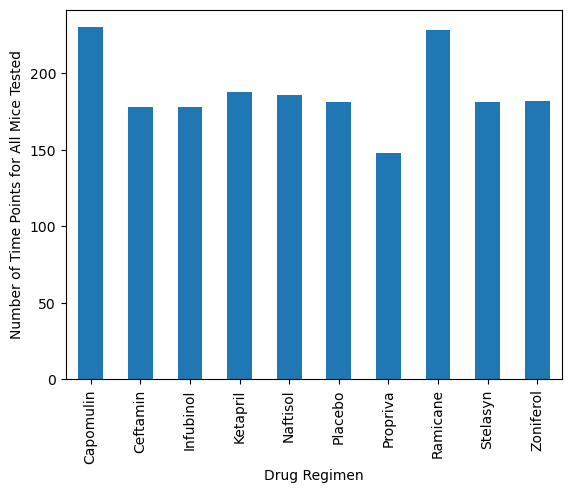

In [74]:
# Generate a bar plot showing the total number of time points for all mice tested for each drug regimen throughout the study using Pandas DataFrame.plot() method.
mouse_counted = mouse_cleaned.groupby("Drug Regimen")["Timepoint"].count()
bar1 = mouse_counted.plot.bar(x="Drug Regimen", y="Timepoint", rot=90)
bar1.set_ylabel('Number of Time Points for All Mice Tested')



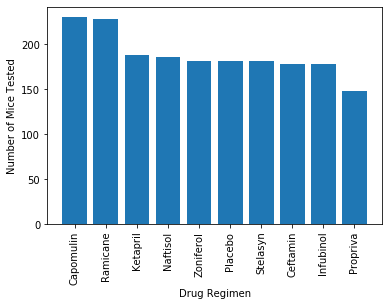

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



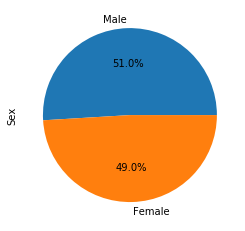

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



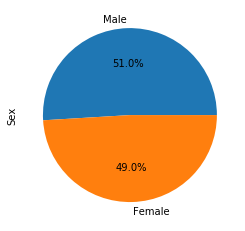

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [63]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = mouse_no_duplicates["Drug Regimen"].unique()
treatments
# Create empty list to fill with tumor vol data (for plotting)
tumor_dat = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = dat.quantile(.25,.5,.75)

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

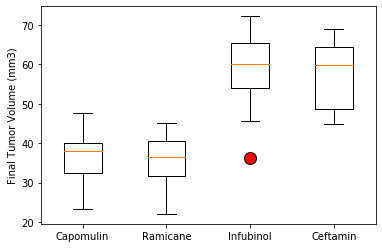

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

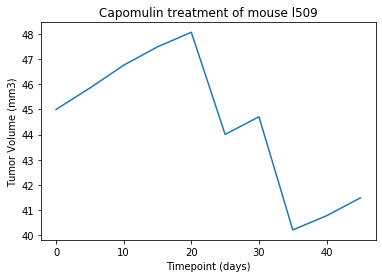

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



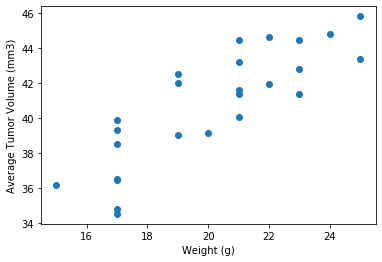

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


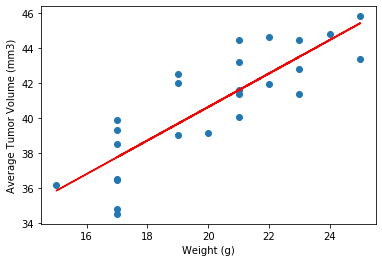

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

